# ASTR 400B Research Assignment:
This code is a draft for what will be used for my final project.
The general topic of my research assignment is analyzing how galaxies and dark matter halos evolve together through mergers. The major question is whether the dark matter halo remnant will be prograde or retrograde, relative to the rotation of the baryon disk. This code will focus on the angular momentum calculation which is then used to analyze whether the halo is prograde or retrograde.

In [1]:
# import modules
import numpy as np
import astropy.units as u

# import plotting module
import matplotlib
import matplotlib.pyplot as plt

# import previous code
from ReadFile import Read
from CenterOfMassSoln import CenterOfMass

# Angular Momentum
To calculate the angular momentum:
\begin{equation}
    \vec{L} = \sum_{i} \vec{r_i} \times \vec{p_i} = \sum_{i} m_i (\vec{r_i} \times \vec{v_i})
\end{equation}
To answer this question, we need to analyze the direction of the angular momentum of the halo and the angular momentum of the disk. If the dark matter halo is prograde, the orbital rotation is in the same direction and if the dark matter halo is retrograde, the orbital rotation is in the opposite direction. For the variables: $m_i$ is the mass of the individual particle, $r_i$ is the three-dimensional position vector of the particle, adjusted for the center of mass position, and $v_i$ is the three-dimensional velocity vector of the particle, also adjusted for the center of mass velocity. The sum is the addition of the angular momentum for all particles of that type (either dark matter or disk). We will retrieve the particle data from different functions. The radius of the particle will come from the ParticleProperties function and the COM_P function within the CenterOfMass class. The velocity of the particle will also come from the ParticleProperties function and the COM_V function within the CenterOfMass class. The mass of the particle will come from the ParticleProperties function.

In [3]:
def AngularMomentum(filename, type, r_max=None):
    '''
        This function calculates the mean specific angular momentum for the given particle type, 
        for a given galaxy within the specified radius

        PARAMETERS:
        -----------
            filename: 'str'
                the name of the file containing galaxy information
            type: 'int' (i.e. 1, 2, or 3)
                the particle type (1 for halo, 2 for disk)
            r_max: 'float'
                the max radius of considered particles

        OUTPUT:
        -------
            L_norm: np.array
                the  specific angular momentum vector 
                of the particles of a given type within r_max
    '''
    
    # galaxy COM computed from disk particles
    # we want the galaxy's COM to be dependent on the disk particles
    # for both DM and stellar calculations
    # this will allow for more consistency with calculations between 
    # the two desired particle types
    galaxy_COM = CenterOfMass(filename, 2)
    
    # store the COM position and COM velocity of the disk
    r_COM = galaxy_COM.COM_P(0.1)
    v_COM = galaxy_COM.COM_V(r_COM[0], r_COM[1], r_COM[2])
    
    # create a new instance of center of mass to load in the
    # particle positions and velocities of the desired type
    ptype_COM = CenterOfMass(filename, type)
    
    # following Lab 7 
    # determine the positions of the desired particles relative to 
    # the galaxy COM from disk particles
    x = ptype_COM.x - r_COM[0].value 
    y = ptype_COM.y - r_COM[1].value 
    z = ptype_COM.z - r_COM[2].value 

    # compute the magnitude of the particle's radius
    r_mag = np.sqrt(x**2 + y**2 + z**2)

    # determine the velocities of the desired particles relative to 
    # the galaxy COM motion
    vx = ptype_COM.vx - v_COM[0].value 
    vy = ptype_COM.vy - v_COM[1].value 
    vz = ptype_COM.vz - v_COM[2].value 

    # set up the arrays for r and v 
    r = np.array([x,y,z]).T # transposed 
    v = np.array([vx,vy,vz]).T
    
    # identify the particles that are within the desired radius
    index = np.where(r_mag < r_max)
    
    # From RotateFrame in Lab 7:
    # compute the specific angular momentum for all particles within the desired radius
    L = np.sum(np.cross(r[index[0],:],v[index[0],:]), axis=0)

    # normalize the specific angular momentum vector
    #L_norm = L/np.sqrt(np.sum(L**2))
    L_norm = L/np.linalg.norm(L)

    return L_norm

# Calculating the angular momentum at each snapshot:

The individual galaxies throughout time:
--------------------------------------------------

In [6]:
# initialize arrays for plotting

n = 17
times = np.zeros(n)

MW_halo_L = np.zeros((n,3))
MW_disk_L = np.zeros((n,3))

M31_halo_L = np.zeros((n,3))
M31_disk_L = np.zeros((n,3))

In [8]:
# loop through the snapshots for each galaxy
for i, snapshot in enumerate(np.arange(0,801,50)):

    # extract the text files from each galaxy folder
    MW_file = r'C:\\Users\\savan\\MW' + f'/MW_{snapshot:03d}' + '.txt'
    M31_file = r'C:\\Users\\savan\\M31' + f'/M31_{snapshot:03d}' + '.txt'

    # read time for plotting
    time, _, _ = Read(MW_file)
    times[i] = time.to(u.Gyr).value

    # compute the angular momenta for MW
    MW_halo_L[i,:] = AngularMomentum(MW_file, 1, 20)
    MW_disk_L[i,:] = AngularMomentum(MW_file, 2, 15)

    '''
    print(f'MW halo L at {snapshot}: {MW_halo_L[i,:]}') 
    print(f'MW disk L at {snapshot}: {MW_disk_L[i,:]}') 
    # double checking that the MW ang momentum vector is normalized
    print("halo magnitude", np.sqrt(MW_halo_L[i,0]**2 + MW_halo_L[i,1]**2 + MW_halo_L[i,2]**2))
    print("disk magnitude", np.sqrt(MW_disk_L[i,0]**2 + MW_disk_L[i,1]**2 + MW_disk_L[i,2]**2))
    print('')
    '''

    # compute the angular momenta for M31
    M31_halo_L[i,:] = AngularMomentum(M31_file, 1, 20)
    M31_disk_L[i,:] = AngularMomentum(M31_file, 2, 15)

    '''
    print(f'M31 halo L at {snapshot}: {M31_halo_L[i,:]}') 
    print(f'M31 disk L at {snapshot}: {M31_disk_L[i,:]}') 
    # double checking that the MW ang momentum vector is normalized
    print("halo magnitude", np.sqrt(M31_halo_L[i,0]**2 + M31_halo_L[i,1]**2 + M31_halo_L[i,2]**2))
    print("disk magnitude", np.sqrt(M31_disk_L[i,0]**2 + M31_disk_L[i,1]**2 + M31_disk_L[i,2]**2))
    print('')
    '''

The galaxy remnant after 6.5 Gyr in the future:
---------------------------------------------------------

In [10]:
# from homework 6, question 3: MW-M31 merge between 6.5 and 7 Gyr (somewhere around 6.7 Gyr)
# correlates to a snapshot of 469
# with the snapshots I loop through, the first snapshot to analyze the remnant would be 450

n_merger = 9

times_post = np.zeros(n_merger)

remnant_halo_L = np.zeros((n_merger,3))
remnant_disk_L = np.zeros((n_merger,3))

remnant_halo_L_norm = np.zeros((n_merger,3))
remnant_disk_L_norm = np.zeros((n_merger,3))

In [11]:
# loop through the snapshots for each galaxy
for i, snapshot in enumerate(np.arange(450,801,50)):

    # extract the text files from each galaxy folder
    MW_file = r'C:\\Users\\savan\\MW' + f'/MW_{snapshot:03d}' + '.txt'
    M31_file = r'C:\\Users\\savan\\M31' + f'/M31_{snapshot:03d}' + '.txt'

    # read time for plotting
    time, _, _ = Read(MW_file)
    times_post[i] = time.to(u.Gyr).value

    # compute the angular momenta for MW
    remnant_halo_L[i,:] = AngularMomentum(MW_file, 1, 20) + AngularMomentum(M31_file, 1, 20)
    remnant_disk_L[i,:] = AngularMomentum(MW_file, 2, 15) + AngularMomentum(M31_file, 2, 15)

    # re-normalize the remnant vectors
    remnant_halo_L_norm[i,:] = remnant_halo_L[i,:] / np.linalg.norm(remnant_halo_L[i,:])
    remnant_disk_L_norm[i,:] = remnant_disk_L[i,:] / np.linalg.norm(remnant_disk_L[i,:])

    '''
    print(f'remnant halo L norm: {remnant_halo_L_norm[i,:]}')
    print(f'remnant disk L norm: {remnant_disk_L_norm[i,:]}')
    # double checking that the MW ang momentum vector is normalized
    print("halo magnitude", np.sqrt(remnant_halo_L_norm[i,0]**2 + remnant_halo_L_norm[i,1]**2 + remnant_halo_L_norm[i,2]**2))
    print("disk magnitude", np.sqrt(remnant_disk_L_norm[i,0]**2 + remnant_disk_L_norm[i,1]**2 + remnant_disk_L_norm[i,2]**2))
    '''

# Prograde or Retrograde?
Because the angular momentum vectors are in 3D and the directions are not simply clockwise or counterclockwise, we must calculate the dot product between the two vectors to determine whether they oppose each other or not.
\begin{equation}
    \vec{L_{halo}} \cdot \vec{L_{disk}} = |\vec{L_{halo}}||\vec{L_{disk}}|cos\theta \rightarrow cos\theta = \frac{\vec{L_{halo}} \cdot \vec{L_{disk}}}{|\vec{L_{halo}}||\vec{L_{disk}}|}
\end{equation}
If the cosine term is negative, the orbit of the dark matter halo is retrograde. If the cosine term is positive, the orbit of the dark matter halo is prograde.

Analyzing the individual galaxies throughout time:
--------------------------------------------------

In [16]:
MW_cos = np.zeros(n)
M31_cos = np.zeros(n)

for i in range(n):

    # compute the dot product of MW components
    MW_cos[i] = np.dot(MW_halo_L[i], MW_disk_L[i])
    
    # compute the dot product of M31 components
    M31_cos[i] = np.dot(M31_halo_L[i], M31_disk_L[i])

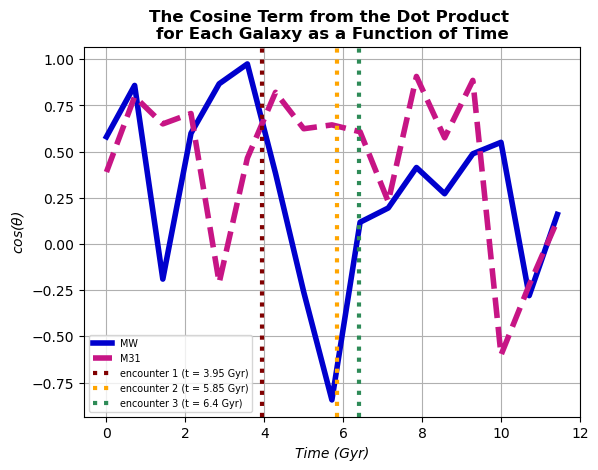

In [17]:
# plot the dot product as a function of time

plt.title('The Cosine Term from the Dot Product \nfor Each Galaxy as a Function of Time').set_weight('bold')

plt.plot(times, MW_cos, lw=4, color='mediumblue', label='MW')
plt.plot(times, M31_cos, lw=4, linestyle='--', color='mediumvioletred', label='M31')

plt.axvline(x=3.95, color='maroon', linestyle=':', linewidth=3, label='encounter 1 (t = 3.95 Gyr)')
plt.axvline(x=5.85, color='orange', linestyle=':', linewidth=3, label='encounter 2 (t = 5.85 Gyr)')
plt.axvline(x=6.4, color='seagreen', linestyle=':', linewidth=3, label='encounter 3 (t = 6.4 Gyr)')

plt.legend(fontsize='x-small')
plt.grid(True)

# add axis labels
plt.xlabel('Time (Gyr)').set_style('italic')
plt.ylabel(r'cos($\theta$)').set_style('italic')

# adjust tick label font size
label_size = 10
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.savefig('CosineTermVsTime.png')

Analyzing the galaxy remnant after 6.5 Gyr in the future:
---------------------------------------------------------

In [19]:
remnant_cos = np.zeros(n_merger-1)

for i in range(n_merger-1):
    
    # compute the dot product of remnant components
    remnant_cos[i] = np.dot(remnant_halo_L_norm[i], remnant_disk_L_norm[i])

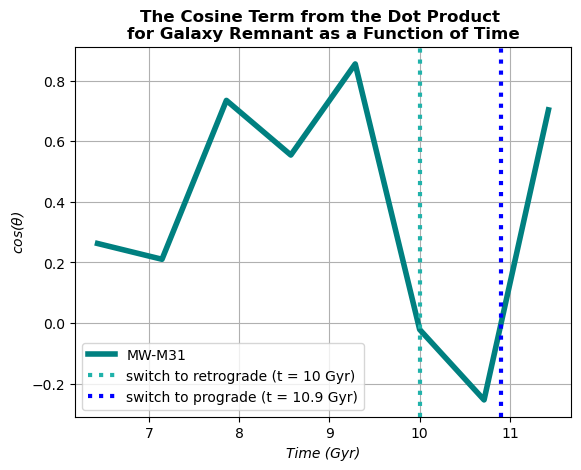

In [20]:
# plot the dot product as a function of time POST-MERGER

plt.title('The Cosine Term from the Dot Product \nfor Galaxy Remnant as a Function of Time').set_weight('bold')

# plot dot product
plt.plot(times_post[:-1], remnant_cos, lw=4, color='teal', label='MW-M31')
plt.axvline(x=10, color='lightseagreen', linestyle=':', linewidth=3, label='switch to retrograde (t = 10 Gyr)')
plt.axvline(x=10.9, color='blue', linestyle=':', linewidth=3, label='switch to prograde (t = 10.9 Gyr)')

plt.legend()
plt.grid(True)

# add axis labels
plt.xlabel('Time (Gyr)').set_style('italic')
plt.ylabel(r'cos($\theta$)').set_style('italic')

# adjust tick label font size
label_size = 10
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.savefig('CosineTermVsTimePOSTMERGER.png')

# Plotting the orbit from homework 6
The next section of the code is from ASTR 400B homework 6 where we analyzed the orbit of the local group throughout the simulation data. For this project, I am plotting the separation of the MW and M31 as time increases so that I can compare the separation to the changing of the sign of the cosine term from dot product of the angular momentum of the DM halo and the stellar disk.

In [22]:
def OrbitCOM(galaxy, start, end, n):
    """
    function that loops over all the desired snapshots to compute the 
    COM pos and vel as a function of time

    PARAMETERS:
    ----------
        galaxy: 'str'
            the name of the galaxy (MW, M31, or M33)
        start: 'int'
            the number of the first snapshot to be read in
        end: 'int'
            the number of the last snapshot to be read in
        n: 'int'
            indicates the interval over while the COM will be returned
          
    RETURNS:
    -------
        fileout: .txt file
            text file with the orbital info (t, x, y, z, vx, vy, vz) of COM 
            at specified snapshots
    """
    
    # composing the filename for the output
    fileout = 'Orbit_%s.txt'%(galaxy)
    
    # setting tolerance and VolDec for calculating COM_P in CenterOfMass
    delta = 0.1
    if galaxy == "M33":
        volDec = 4.0  # M33 is stripped more
    else:
        volDec = 2.0  # standard volDec value for other galaxies
    
    # generating the snapshot id sequence
    snap_ids = np.arange(start, end+n, n)
    # checking that the array is not empty but stopping the code if it is empty
    if snap_ids.size == 0:
        print("no snapshots found (invalid input)")
        return
    
    # initializing the array for orbital info: t, x, y, z, vx, vy, vz of COM
    # one row for every value in snap_ids array
    # 7 columns for orbital info of COM
    orbit = np.zeros([len(snap_ids),7]) 
    
    # looping over the txt files within each galaxy folder 
    # each folder is named as the galaxy name (MW, M31, or M33)
    for i, snap_id in enumerate(snap_ids):
        
        # composing the data filename
        ilbl = f"{snap_id:03d}"  # looks at the last three digits of the snapshot file
        filename = f"{galaxy}/{galaxy}_{ilbl}.txt" # folder/file
        
        # initializing an instance of CenterOfMass class
        # number 2 corresponds to disk particles
        COM = CenterOfMass(filename, 2)
        
        # storing the COM positions with new COM_P function
        COM_p = COM.COM_P(delta)
        # storing the COM velocities
        COM_v = COM.COM_V(COM_p[0], COM_p[1], COM_p[2])
    
        # storing the time, position, and velocity in the ith element of the orbit array, 
        # without units (.value)
        # orbit[row,column] so looping through i rows in new text file for every snapshot
        orbit[i,0] = COM.time.to(u.Gyr).value  # Myr in snapshot data but we want Gyr
        orbit[i,1] = COM_p[0].value  # x position
        orbit[i,2] = COM_p[1].value  # y position
        orbit[i,3] = COM_p[2].value  # z position
        orbit[i,4] = COM_v[0].value  # vx
        orbit[i,5] = COM_v[1].value  # vx
        orbit[i,6] = COM_v[2].value  # vx

        # print snap_id to see the progress
        # print(f"snapshot: {snap_id}")
        
    # writing the data to a file (don't want to have to repeat this process) 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))
    print(f"{fileout} saved")

In [23]:
# recovering the orbits and generating the COM files for each galaxy
# reading in 800 snapshots in intervals of n=5 
OrbitCOM("MW", 0, 800, 5)
OrbitCOM("M31", 0, 800, 5)

Orbit_MW.txt saved
Orbit_M31.txt saved


In [24]:
# reading in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt

MW_data = np.genfromtxt('Orbit_MW.txt', dtype=None, names=True)
M31_data = np.genfromtxt('Orbit_M31.txt', dtype=None, names=True)

In [25]:
# function to compute the magnitude of the difference between two vectors 
# using this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  
def VectorMagnitude(obj1, obj2):
    '''
    function computes the magnitude of the difference between two 3-dimensional vectors

    PARAMETERS:
    ----------
        obj1: '3-dimensional array of floats or astropy quantities'
            position/velocity vector of the first object
        obj2: '3-dimensional array of floats or astropy quantities'
            position/velocity vector of the second object

    RETURNS:
    -------
        mag: 'float or astropy quantity'
            magnitude of the difference between the two vectors
    '''

    # finding the distance between each vector for the x, y, and z direction
    x_diff = obj1[0] - obj2[0]
    y_diff = obj1[1] - obj2[1]
    z_diff = obj1[2] - obj2[2]

    # computing the magnitude of the differences
    mag = np.sqrt( (x_diff**2) + (y_diff**2) + (z_diff**2) )
    return mag


In [26]:
# position vectors of each galaxy with respect to 0,0,0
MW_pos = np.array([MW_data['x'], MW_data['y'], MW_data['z']])
M31_pos = np.array([M31_data['x'], M31_data['y'], M31_data['z']])

In [27]:
# Determine the magnitude of the relative position and velocities
# of MW and M31
r_MW_M31 = VectorMagnitude(MW_pos, M31_pos)

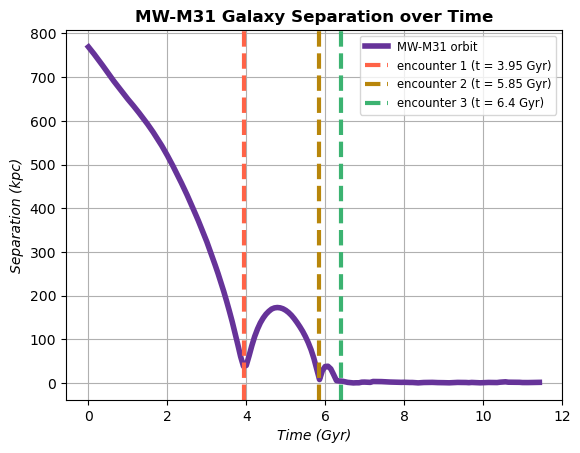

In [28]:
# Plot the Orbit of the galaxies

plt.title('MW-M31 Galaxy Separation over Time').set_weight('bold')
plt.xlabel('Time (Gyr)').set_style('italic')
plt.ylabel('Separation (kpc)').set_style('italic')

# plot orbit and encounter lines
plt.plot(M31_data['t'], r_MW_M31, linewidth=4, color='rebeccapurple', label='MW-M31 orbit')
plt.axvline(x=3.95, color='tomato', linestyle='--', linewidth=3, label='encounter 1 (t = 3.95 Gyr)')
plt.axvline(x=5.85, color='darkgoldenrod', linestyle='--', linewidth=3, label='encounter 2 (t = 5.85 Gyr)')
plt.axvline(x=6.4, color='mediumseagreen', linestyle='--', linewidth=3, label='encounter 3 (t = 6.4 Gyr)')

plt.grid(True)
plt.legend(fontsize='small')
plt.savefig('MW-M31_Separation.png')
plt.show()